In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # statistical data visualization

# Folosește următoarea linie doar în Jupyter Notebook
# %matplotlib inline

# Calea către fișierul CSV pe desktop
data = 'C:/Users/state/Desktop/dmdw_proiect/diabetes_data.csv'

# Verificarea existenței fișierului
import os

if os.path.exists(data):
    print("Fișierul există.")
else:
    print("Fișierul nu există. Verifică calea specificată.")

# Încărcarea datelor
try:
    # Încărcarea datelor presupunând că primul rând conține numele coloanelor
    df = pd.read_csv(data, header=0)
    print("Datele au fost încărcate cu succes!")
    
    # Salvarea numelor coloanelor într-o listă
    col_names = df.columns.tolist()
    print("Numele coloanelor sunt:", col_names)
    print(df.head())
except Exception as e:
    print(f"A apărut o eroare la încărcarea datelor: {e}")


Fișierul nu există. Verifică calea specificată.
A apărut o eroare la încărcarea datelor: [Errno 2] No such file or directory: 'C:/Users/state/Desktop/dmdw_proiect/diabetes_data.csv'


In [2]:
df.shape

NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [ ]:
#get column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [ ]:
df.shape

(70692, 18)

In [ ]:
#check unique values

unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Age,13
Sex,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


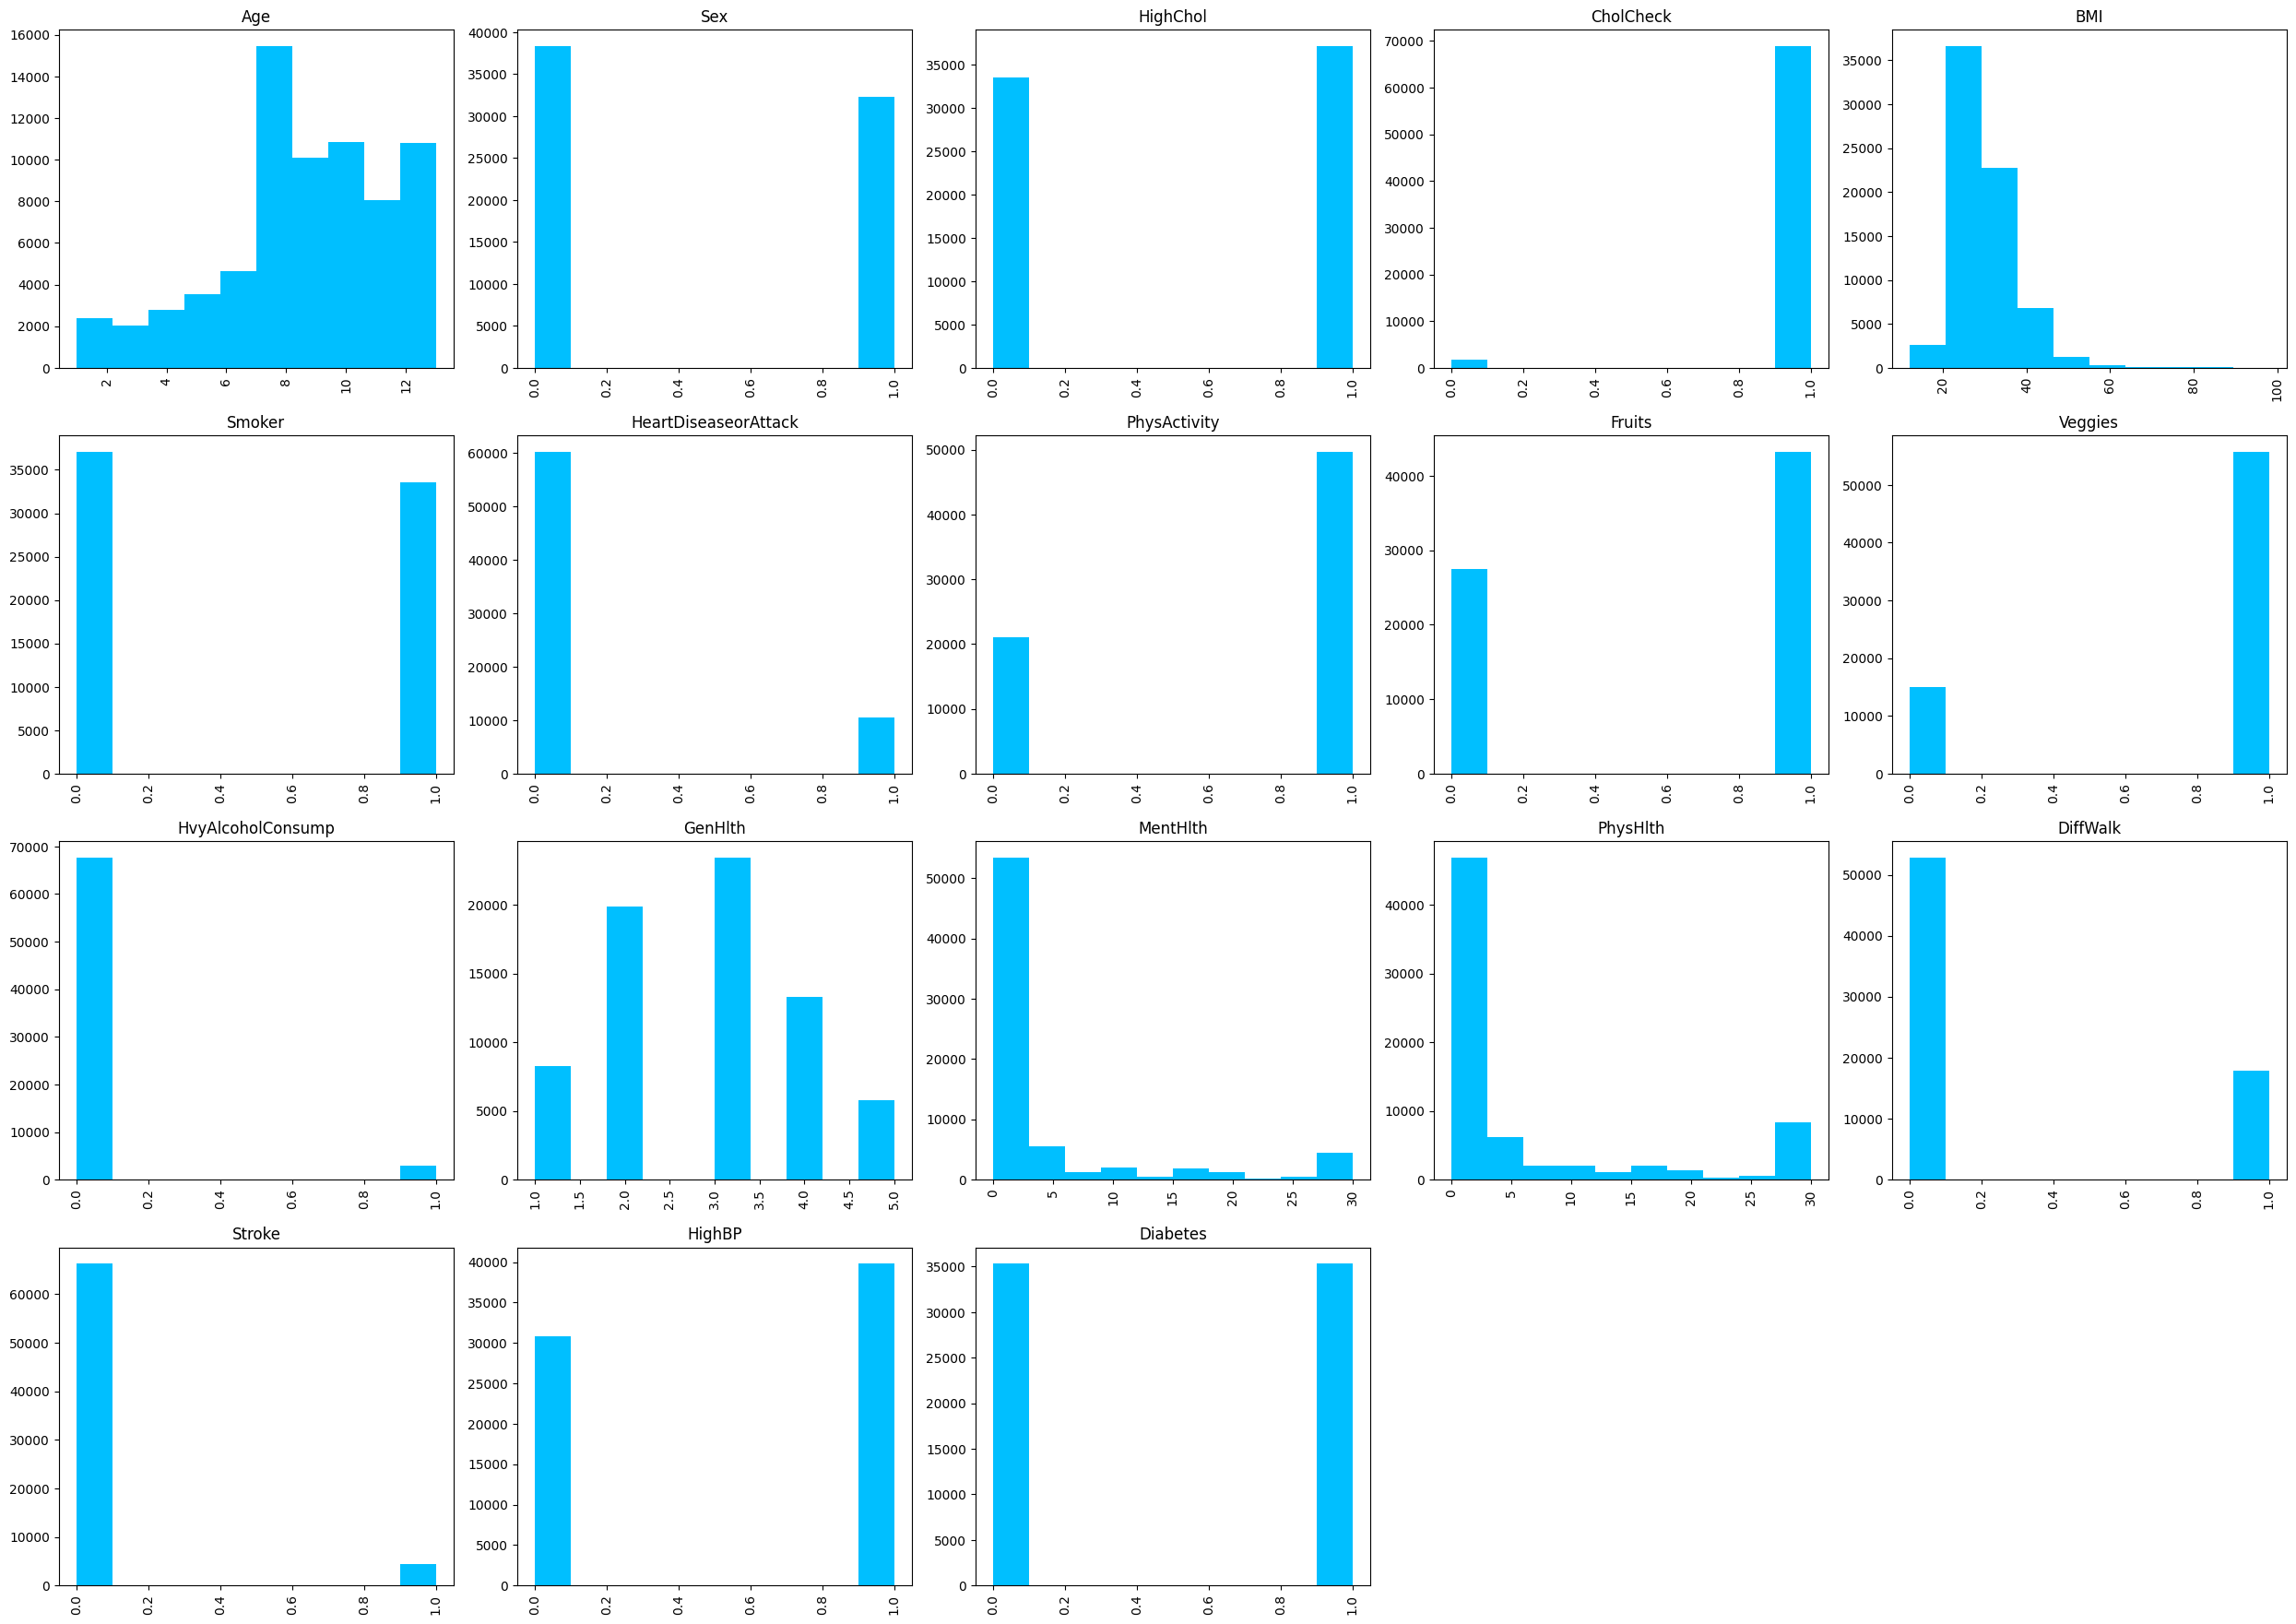

In [ ]:
#check frequency of all values in the column

# All data columns except for color
feature_cols = [x for x in df.columns if x not in 'stroke']
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(df[feature_cols[i]],color = "deepskyblue")
    
plt.tight_layout()

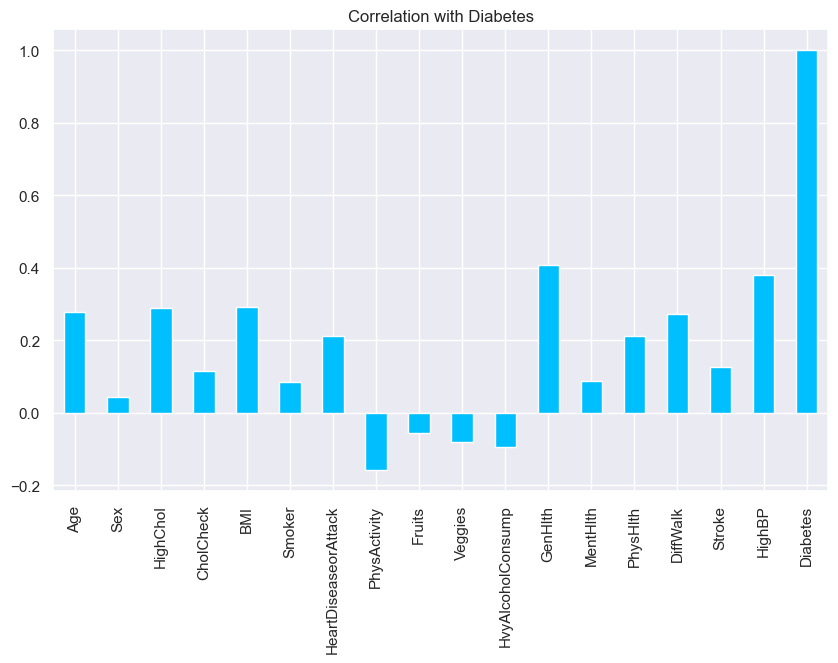

In [ ]:
# check correlation of other columns with diabetes column
df.corrwith(df['Diabetes']).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes", color="deepskyblue");


In [ ]:
#variables with correlation less than 0.1 are Sex, Smoker, Fruits, Veggies

<Axes: >

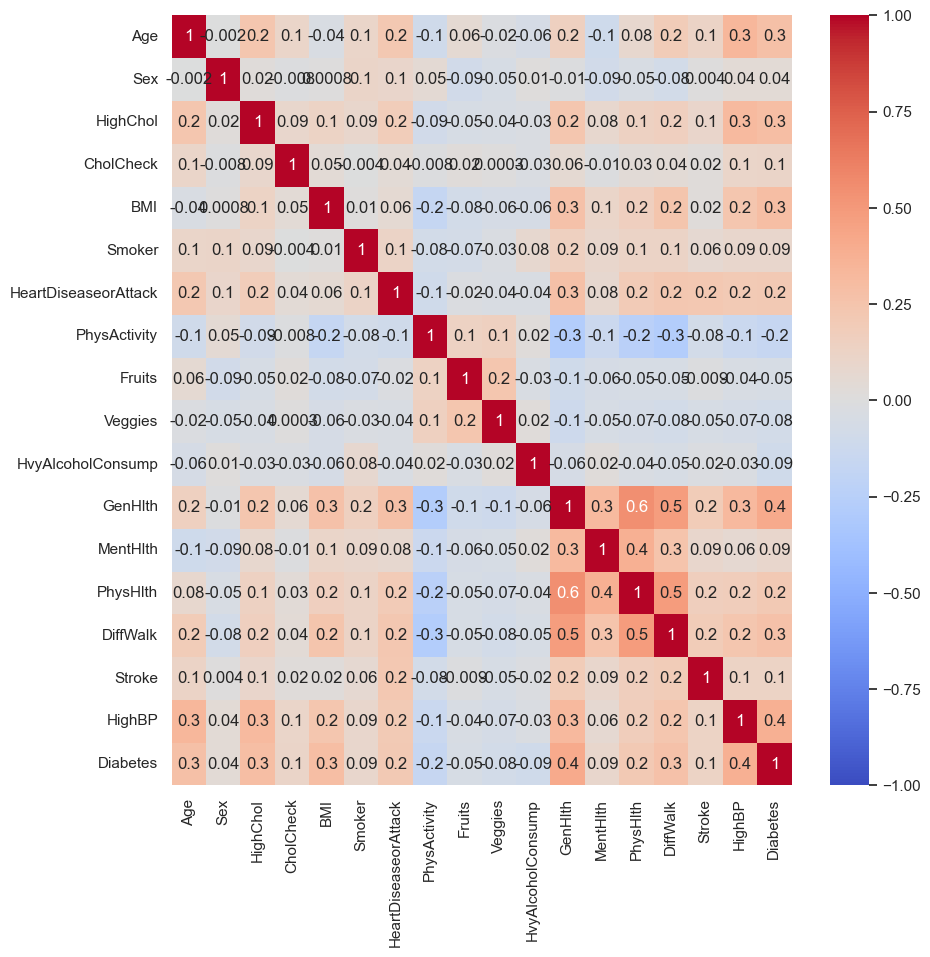

In [ ]:
# Correlation between any two features
# check for possible co-variates

sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

In [ ]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [ ]:
#Data splitting
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
y = (df['Diabetes']).astype(int)
X = df.loc[:, df.columns != 'Diabetes']  # everything except "diabetes"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #70% train 

In [ ]:
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
X_test.shape

(21208, 18)

In [ ]:
X_train.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

In [ ]:
X_train.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
14533,13.0,0.0,1.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
57060,10.0,0.0,1.0,1.0,34.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0
26147,10.0,0.0,1.0,1.0,34.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,11.0,5.0,1.0,0.0,1.0,0.0
24376,4.0,0.0,0.0,0.0,32.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
49271,7.0,0.0,0.0,1.0,37.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,20.0,5.0,0.0,0.0,1.0,1.0


In [ ]:
X_train.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
14533,13.0,0.0,1.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
57060,10.0,0.0,1.0,1.0,34.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0
26147,10.0,0.0,1.0,1.0,34.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,11.0,5.0,1.0,0.0,1.0,0.0
24376,4.0,0.0,0.0,0.0,32.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
49271,7.0,0.0,0.0,1.0,37.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,20.0,5.0,0.0,0.0,1.0,1.0


In [ ]:
X_test.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
44967,10.0,0.0,1.0,1.0,23.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
20220,13.0,0.0,0.0,1.0,33.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,3.0,1.0,0.0,0.0,0.0
23944,8.0,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,5.0,0.0,0.0,1.0,0.0
2707,7.0,1.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0
42356,6.0,1.0,0.0,1.0,47.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,30.0,10.0,1.0,0.0,1.0,1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))## ce am prezis y_pred_gini si ce este de fapt y_test

Model accuracy score with criterion gini index: 0.7191


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7188
Test set score: 0.7191


[Text(0.5, 0.875, 'x[16] <= 0.5\ngini = 0.5\nsamples = 49484\nvalue = [24745.0, 24739.0]'),
 Text(0.25, 0.625, 'x[11] <= 2.5\ngini = 0.406\nsamples = 21594\nvalue = [15486.0, 6108.0]'),
 Text(0.125, 0.375, 'x[0] <= 9.5\ngini = 0.248\nsamples = 12136\nvalue = [10378, 1758]'),
 Text(0.0625, 0.125, 'gini = 0.185\nsamples = 9056\nvalue = [8121, 935]'),
 Text(0.1875, 0.125, 'gini = 0.392\nsamples = 3080\nvalue = [2257.0, 823.0]'),
 Text(0.375, 0.375, 'x[0] <= 6.5\ngini = 0.497\nsamples = 9458\nvalue = [5108, 4350]'),
 Text(0.3125, 0.125, 'gini = 0.419\nsamples = 3002\nvalue = [2105, 897]'),
 Text(0.4375, 0.125, 'gini = 0.498\nsamples = 6456\nvalue = [3003.0, 3453.0]'),
 Text(0.75, 0.625, 'x[11] <= 2.5\ngini = 0.444\nsamples = 27890\nvalue = [9259, 18631]'),
 Text(0.625, 0.375, 'x[4] <= 29.5\ngini = 0.498\nsamples = 7679\nvalue = [4096, 3583]'),
 Text(0.5625, 0.125, 'gini = 0.474\nsamples = 4392\nvalue = [2697, 1695]'),
 Text(0.6875, 0.125, 'gini = 0.489\nsamples = 3287\nvalue = [1399, 1888]

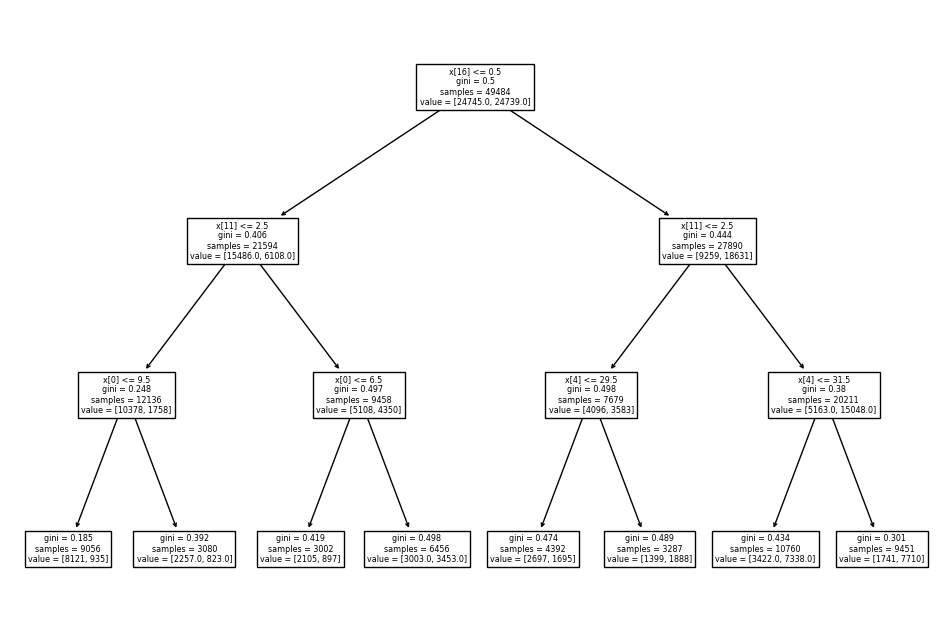

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7170


In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7155


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7155
Test set score: 0.7170


[Text(0.5, 0.875, 'x[16] <= 0.5\nentropy = 1.0\nsamples = 49484\nvalue = [24745.0, 24739.0]'),
 Text(0.25, 0.625, 'x[11] <= 2.5\nentropy = 0.859\nsamples = 21594\nvalue = [15486.0, 6108.0]'),
 Text(0.125, 0.375, 'x[0] <= 8.5\nentropy = 0.597\nsamples = 12136\nvalue = [10378, 1758]'),
 Text(0.0625, 0.125, 'entropy = 0.439\nsamples = 7655\nvalue = [6960, 695]'),
 Text(0.1875, 0.125, 'entropy = 0.79\nsamples = 4481\nvalue = [3418, 1063]'),
 Text(0.375, 0.375, 'x[0] <= 5.5\nentropy = 0.995\nsamples = 9458\nvalue = [5108, 4350]'),
 Text(0.3125, 0.125, 'entropy = 0.827\nsamples = 2178\nvalue = [1612, 566]'),
 Text(0.4375, 0.125, 'entropy = 0.999\nsamples = 7280\nvalue = [3496.0, 3784.0]'),
 Text(0.75, 0.625, 'x[11] <= 2.5\nentropy = 0.917\nsamples = 27890\nvalue = [9259, 18631]'),
 Text(0.625, 0.375, 'x[4] <= 29.5\nentropy = 0.997\nsamples = 7679\nvalue = [4096, 3583]'),
 Text(0.5625, 0.125, 'entropy = 0.962\nsamples = 4392\nvalue = [2697, 1695]'),
 Text(0.6875, 0.125, 'entropy = 0.984\nsamp

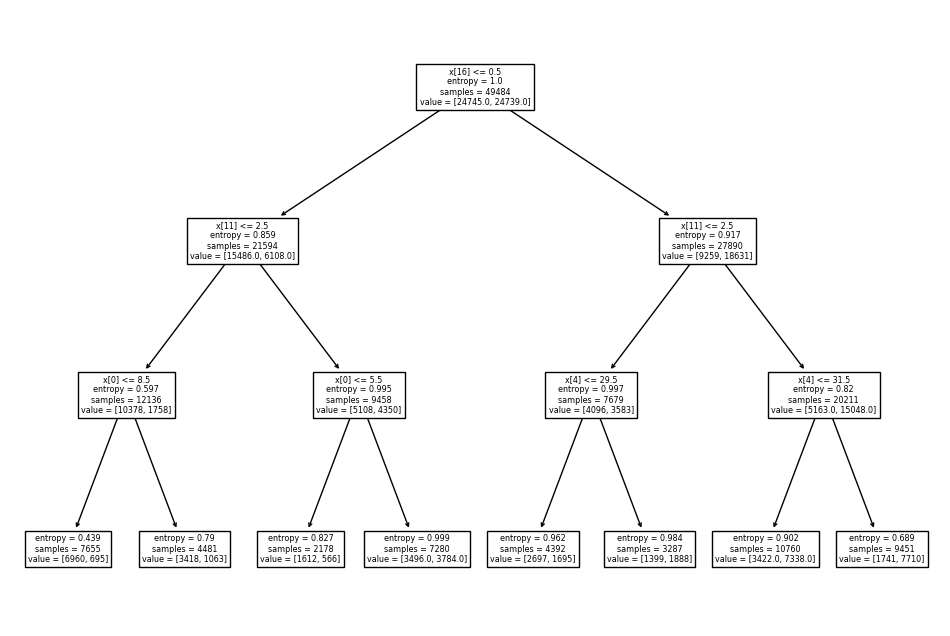

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)
# 6524 = avea diabet si algoritmul a prezis corect
# 8953 = nu avea diabet si agoritmul a prezis corect
#4347 = nu avea diabet, dar algoritmul a prezis ca avea
# 1654 = avea diabet, dar algoritmul nu l a prezis corect

Confusion matrix

 [[6254 4347]
 [1654 8953]]
